In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
import pandas as pd

df=pd.read_csv(r"C:\Users\mombo\OneDrive\Desktop\IRONHACK - COURSE\SEM 5\DAY 1\LAB\amz_uk_price_prediction_dataset.csv\amz_uk_price_prediction_dataset.csv",
    sep=';')

df.head()
df.head()

C:\Users\mombo\AppData\Local\Temp\ipykernel_26364\753510693.py:3: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\mombo\OneDrive\Desktop\IRONHACK - COURSE\SEM 5\DAY 1\LAB\amz_uk_price_prediction_dataset.csv\amz_uk_price_prediction_dataset.csv",


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308.0,21.99,False,0.0,Hi-Fi Speakers,NaN,NaN,NaN
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099.0,23.99,True,0.0,Hi-Fi Speakers,NaN,NaN,NaN
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308.0,21.99,False,0.0,Hi-Fi Speakers,NaN,NaN,NaN
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205.0,31.99,False,0.0,Hi-Fi Speakers,NaN,NaN,NaN
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881.0,17.99,False,0.0,Hi-Fi Speakers,NaN,NaN,NaN


In [4]:
df.shape


(1048575, 12)

In [5]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11'],
      dtype='object')

In [6]:
#1Generate a frequency table for the product category.

df_frequency=df["category"].value_counts ()
df_frequency 

category
Sports & Outdoors               414517
Bath & Body                      19061
Birthday Gifts                   18932
Manicure & Pedicure Products     18923
Skin Care                        18728
                                 ...  
Motorbike Chassis                   93
Smart Speakers                      46
eBook Readers & Accessories         24
Light Bulbs                         23
Lighting                            16
Name: count, Length: 141, dtype: int64

In [7]:
proportion_table = df["category"].value_counts(normalize=True)
proportion_table

category
Sports & Outdoors               0.395776
Bath & Body                     0.018199
Birthday Gifts                  0.018076
Manicure & Pedicure Products    0.018067
Skin Care                       0.017881
                                  ...   
Motorbike Chassis               0.000089
Smart Speakers                  0.000044
eBook Readers & Accessories     0.000023
Light Bulbs                     0.000022
Lighting                        0.000015
Name: proportion, Length: 141, dtype: float64

In [8]:
# 1.2 Which are the top 5 most listed product categories?
df_frequency=df["category"].value_counts ().head(10)
df_frequency

category
Sports & Outdoors               414517
Bath & Body                      19061
Birthday Gifts                   18932
Manicure & Pedicure Products     18923
Skin Care                        18728
Fragrances                       18550
Handmade Gifts                   18238
Make-up                          18197
Handmade Artwork                 17872
Handmade Kitchen & Dining        17426
Name: count, dtype: int64

C:\Users\mombo\AppData\Local\Temp\ipykernel_26364\2135840997.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_frequency.index, y=df_frequency.values, palette="Set3");


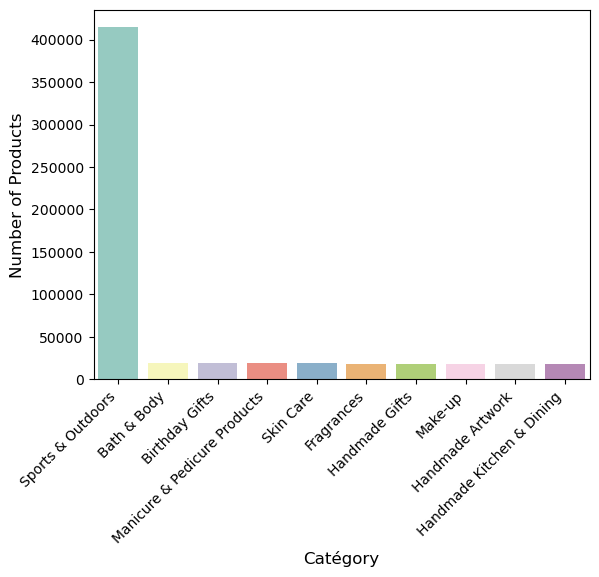

In [9]:
sns.barplot(x=df_frequency.index, y=df_frequency.values, palette="Set3");

plt.xlabel('Catégory', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')



plt.show()

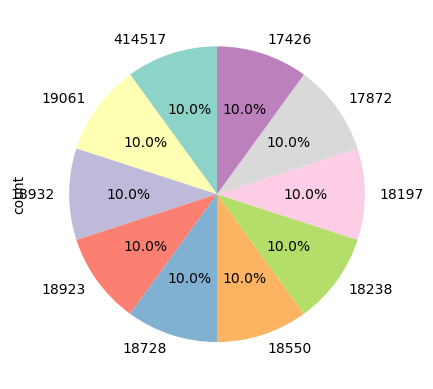

In [12]:
df_frequency.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

In [23]:
#2

mean_price = df['price'].mean().round(2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print (mean_price)
print(median_price)
print(mode_price)


79.18
18.99
9.99


In [36]:
stats_by_category = df.groupby('category')['price'].agg(['mean', 'median']).round().head(10)
stats_by_category

,mean,median
category,,
3D Printers,1018.0,319.0
3D Printing & Scanning,100.0,37.0
Abrasive & Finishing Products,16.0,10.0
Agricultural Equipment & Supplies,23.0,14.0
Alexa Built-In Devices,223.0,150.0
Barebone PCs,365.0,245.0
Basketball Footwear,115.0,70.0
Bath & Body,15.0,12.0
Bathroom Lighting,31.0,26.0


In [37]:
#2.2

variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(75454.50468313506,
 274.68983359988965,
 0.0,
 22933.42,
 22933.42,
 0.25     9.99
 0.50    18.99
 0.75    45.00
 Name: price, dtype: float64)

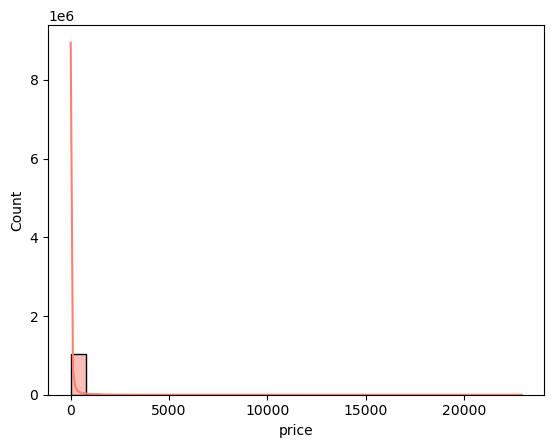

In [40]:
sns.histplot(df['price'], kde=True, bins=30, color="salmon")
plt.show()

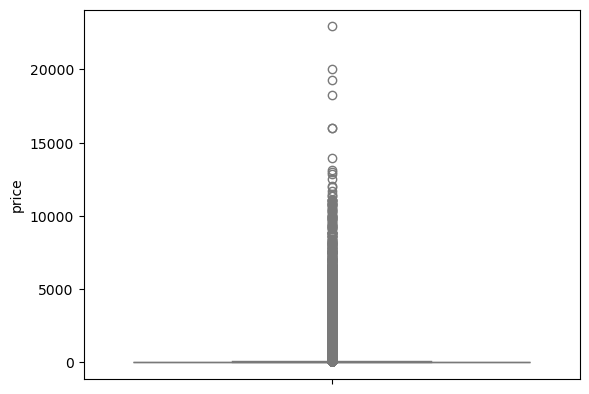

In [41]:
sns.boxplot(data = df['price'], color="lightblue")
plt.show()